<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/3.2_Agoritmos_mejoramiento_imagenes_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.2 Google Colab - Algoritmos de mejoramiento de imágenes en el dominio espacial**

**Equipo 10:**
* Carlos Roberto Torres Ferguson A01215432
* Andrea Carolina Treviño Garza A01034993
* Julio Adrián Quintana Gracia A01793661
* Pablo Alejandro Colunga Vázquez A01793671

In [5]:
#Cargar librerías:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request
import seaborn as sns

**1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?**

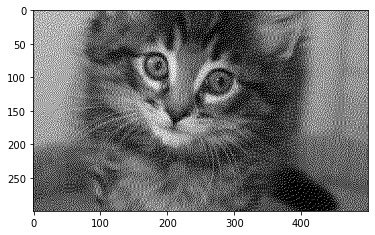

In [6]:
urllib.request.urlretrieve(
  'https://placekitten.com/500/300',
   "image.jpg")
image = Image.open('image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [9]:
image = image.astype(float)

def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros
    
    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

**Prewitt**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/89e0951634f88eb18d06923df71e89eb83e7fff3'/>
* Magnitude <br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79'/>

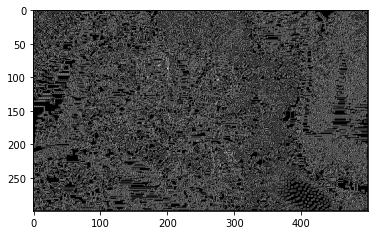

In [10]:
# Prewitt Operator
# Fuente: https://en.wikipedia.org/wiki/Prewitt_operator

def prewitt(img):
  # kernels
  kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
  ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

  # apply x-axis kernel
  gx = apply_filter(img, kx)
  # apply y-axis kernel
  gy = apply_filter(img, ky)

  # gradient magnitude
  J = np.sqrt((gx**2) + (gy**2))
  return J

  
J = prewitt(image)
plt.imshow(J, cmap='gray')
plt.show()

**Sobel**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/848abd56e0e33cf402f01183bfe1f68a93fb34a9'/>
* Magnitude <br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79'/>

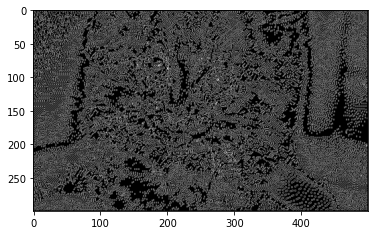

In [11]:
# Sobel Operator
# Fuente: https://en.wikipedia.org/wiki/Sobel_operator

def sobel(img):
  # kernels
  kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  # apply x-axis kernel
  gx = apply_filter(img, kx)
  # apply y-axis kernel
  gy = apply_filter(img, ky)

  # gradient magnitude
  J = np.sqrt((gx**2) + (gy**2))
  return J

J = sobel(image)
plt.imshow(J, cmap='gray')
plt.show()

**Laplace**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/a58cb62fc6fb6a8ecf95edd1060c8a35d50963a4'/>

-4.0
4.0


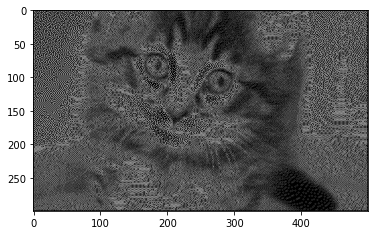

In [21]:
# Laplace Operator
# Fuente: https://www.tutorialspoint.com/dip/laplacian_operator.htm

def laplace(img):
  # kernel
  k = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

  # apply kernel
  J = apply_filter(image, k)

  # check min and max values
  print(np.min(J))
  print(np.max(J))

  # enhance visibility
  alpha = 2
  J = J * alpha

  # remove values below 0 and/or above 255
  J[J < 0] = 0
  J[J > 255] = 255
  
  return J

J = laplace(image)
plt.imshow(J, cmap='gray')
plt.show()

**2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.**

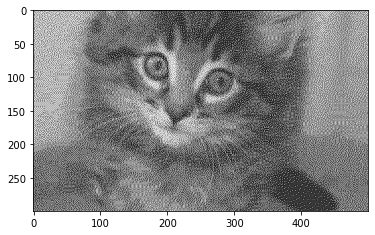

In [22]:
J = prewitt(image)
alpha = 0.1
diff = image - J
result = image + alpha * diff

plt.imshow(result, cmap='gray')
plt.show()

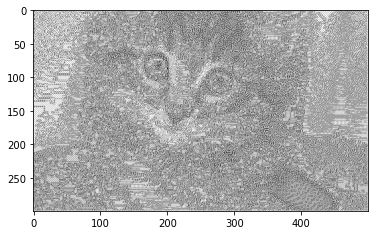

In [26]:
J = prewitt(image)
alpha = 2
diff = image - J
result = image + alpha * diff

plt.imshow(result, cmap='gray')
plt.show()

**3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes**

In [ ]:
# TODO: Challenge, hard image with hard transformations?? -- Eso dice al final del colab que comparte el profe al principio de la actividad.

##**Bibliografía:**